# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [46]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Create the database.
honeyDF = pd.read_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\Graded Assignment 4\\NewUSHoneyProductionDataset.csv")

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\Khazbin\AppData\Local\Temp\ipykernel_3248\2869079625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(honeyDF.corr(), annot = True)


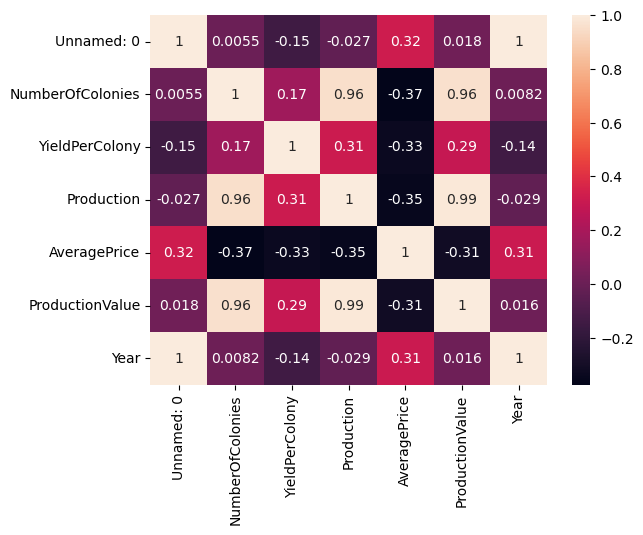

In [2]:
# Heat Map to look at correlations between each variable.
sb.heatmap(honeyDF.corr(), annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [63]:
# Production and ProductionValue technically have the strongest correlation, but ProductionValue is derived from
# Production and AveragePrice, so that's to be expected.

xVar = honeyDF[['ProductionValue']]
yVar = honeyDF['NumberOfColonies']

In [64]:
xTrain, xTest, yTrain, yTest = tts(xVar, yVar)
xTrain, yTrain

(     ProductionValue
 42        29304000.0
 358        1815000.0
 420        2508000.0
 278        3884840.0
 285        2575540.0
 ..               ...
 328        1131500.0
 308       17186400.0
 79         1811480.0
 310        1519560.0
 393         945720.0
 
 [357 rows x 1 columns],
 42     370000
 358     20000
 420     12000
 278     29000
 285     11000
         ...  
 328      5000
 308    120000
 79      22000
 310      7000
 393      6000
 Name: NumberOfColonies, Length: 357, dtype: int64)

In [65]:
xTrainSM = sm.add_constant(xTrain)

lr = sm.OLS(yTrain, xTrainSM).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NumberOfColonies   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     4136.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          1.06e-197
Time:                        01:17:52   Log-Likelihood:                -4166.8
No. Observations:                 357   AIC:                             8338.
Df Residuals:                     355   BIC:                             8345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3803.9734   1800.401      2.113      0.035     263.182    7344.765
ProductionValue     0.0080      0.000     64.309      0.000       0.008       0.008
==============================================================================
Omnibus:                      170.241   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1632.049
Skew:                           1.753   Prob(JB):                         0.00
Kurtosis:                      12.871   Cond. No.                     1.73e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[0.00800509]


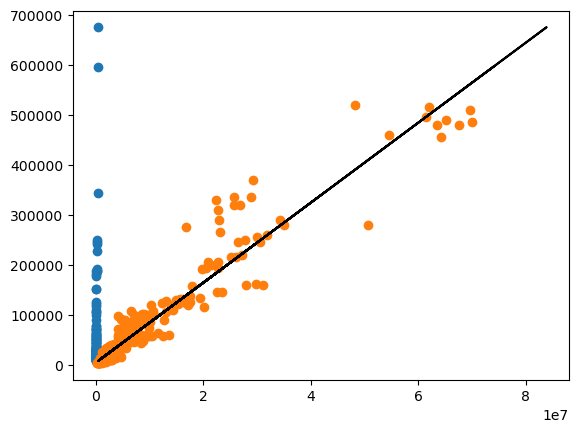

In [66]:
# Creating an instance of LinearRegression model
lmX = LinearRegression()

# Train/fit on the training data
lmX.fit(xTrain,yTrain)

print(lmX.coef_)

# Negative prediction test set.
pred = lmX.predict(xTest)
plt.scatter(yTest,pred)

plt.scatter(xTrain,yTrain)
plt.plot(xTest,pred,color="black")
plt.show()

## Error Terms

Finally, plot your error terms!

In [67]:
yTrainPred = lr.predict(xTrainSM)

# Creating residuals from the yTrain data and predicted Y data
resid = (yTrainPred - yTrain)

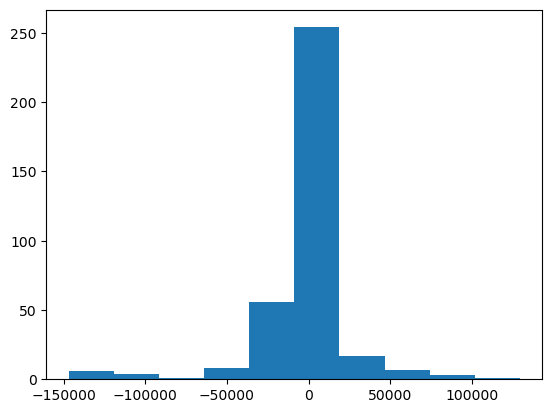

In [68]:
# fig = plt.figure()
plt.hist(resid)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?
0.924.

2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?
Based on the data I obtained through my Tableau analysis and the strong possibility of multicollinearity of the data, I don't think the linear regression model was very effective. I did get a strong R-squared value, but of course having more colonies would lead to a higher production value - more colonies means more production, and production value is derived from production. A lot of the data in this dataset is derived from other data within the dataset.

3. Was your plot of the error terms a bell curve?
It was.